# Google Colaboratory Specs:


- Check that we have enabled GPU capabilities, and inspect GPU specs:
  -  Edit > Notebook settings or Runtime>Change runtime type and select GPU as Hardware accelerator

In [3]:
! /opt/bin/nvidia-smi

Mon Apr 23 03:33:17 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    30W / 149W |      0MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

- Check CPU, RAM, disk-quota and storing capabilities

In [5]:
!cat /proc/meminfo

MemTotal:       13341832 kB
MemFree:         1849328 kB
MemAvailable:   12443920 kB
Buffers:          125464 kB
Cached:         10388640 kB
SwapCached:            0 kB
Active:          1913656 kB
Inactive:        8882020 kB
Active(anon):     352400 kB
Inactive(anon):   183064 kB
Active(file):    1561256 kB
Inactive(file):  8698956 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               328 kB
Writeback:             0 kB
AnonPages:        281648 kB
Mapped:           126320 kB
Shmem:            253900 kB
Slab:             614164 kB
SReclaimable:     587796 kB
SUnreclaim:        26368 kB
KernelStack:        3056 kB
PageTables:         4116 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6670916 kB
Committed_AS:    1467484 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
HugePages_Total: 

In [6]:
! cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc eagerfpu pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm kaiser fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt
bugs		:
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache s

In [7]:
! df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G  5.9G  335G   2% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
/dev/root       1.2G  537M  684M  44% /opt/bin
tmpfs           6.4G  248M  6.2G   4% /usr/lib64-nvidia
/dev/sda1       365G  7.3G  358G   2% /etc/hosts
shm              64M     0   64M   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


## Installing pytorch

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision

# Logistic Regression on MNIST with Pytorch

In [0]:
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
import random

## Brief Pytorch API summary
- The interface is very similar to numpy, operations are based on Tensors, which are roughly similar to numpy ndarrays.
- Most operators return a new tensor after computing, but some can be applied 'in-place', meaning that the operations are performed over the object. These functions generally have an underscore in their name.   
- Simple operations, such as addition and product, are overloaded into Python syntax.
- More complex functions are accessible using the API, having [pytorch.org/docs](http://pytorch.org/docs) in the background when developing is always recommended. Also keep in mind that Pytorch is under active development and the API is subject to change frequently; always make sure that the version of the docs you're reading is the same as the one you have installed.  

In [13]:
x = torch.Tensor([[1,2], [3,4]])
print(x)
print(x.size())


 1  2
 3  4
[torch.FloatTensor of size 2x2]

torch.Size([2, 2])


In [16]:
print(x+1)
x.add_(1)
print(x)


 3  4
 5  6
[torch.FloatTensor of size 2x2]


 3  4
 5  6
[torch.FloatTensor of size 2x2]



- Tensors can be transposed, reshaped and manipulated according to our needs. This is mainly accomplished using the `transpose()` and `view()` functions. 
- These reshapings are generally needed when we use the Pytorch API for neural nets, which makes certain assumptions about the shape of the input data. 

In [20]:
print(x)
print(x.transpose(0, 1))
print(x.view(-1))


 3  4
 5  6
[torch.FloatTensor of size 2x2]


 3  5
 4  6
[torch.FloatTensor of size 2x2]


 3
 4
 5
 6
[torch.FloatTensor of size 4]



In [35]:
a = Variable(torch.FloatTensor([2, 3, 4]))
print(a)
print(a.grad)

Variable containing:
 2
 3
 4
[torch.FloatTensor of size 3]

None


- the `autograd.Variable` object represents one node in the computational graph, meaning that all operations we perform over the object will be recorded. Thus we can later go through the graph for backpropagation. 
- Every `Variable` object contains a `.data` attribute holding the tensor which contains its current value, as well as a `.grad` attribute holding the current value of the gradient. 

- By simply calling the `.cuda()` function on any Tensor, Variable or Module, we can easily move our objects to the GPU.

In [51]:
x.cuda()


 3  4
 5  6
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

- Nodes in the graph should implement both the `forward()` and `backward()` functions, making them suitable to use when training models using backprop.

## Loading and understanding the MNIST dataset
- The torchvision package offers us access to some of the most popular datasets for image classification, let's load the MNIST dataset.

In [21]:
# MNIST dataset (images and labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

Processing...
Done!


In [22]:
print(len(train_dataset))
print(len(test_dataset))

60000
10000


- MINST is a dataset for image classification, with 28x28 pixel images of hadwritten numbers from 0 to 9, every image is labeled with the digit it contains.  

In [27]:
image, label = train_dataset[10]
print(type(image), image.size()) 
print(type(label), label)

<class 'torch.FloatTensor'> torch.Size([1, 28, 28])
<class 'int'> 3


- Let's visualize a random image in the training dataset, we first need to give it the adequate shape.

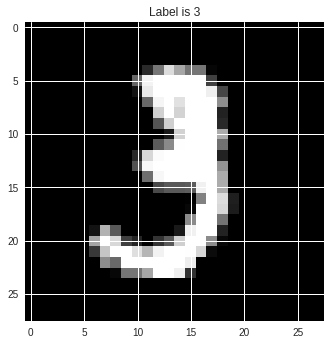

In [36]:
image = image.view(28, 28)
plt.title('Label is {label}'.format(label=label))
plt.imshow(image, cmap='gray')
plt.show()

## Logistic Regression
- Let's start by setting the hyper parameters of our yet-to-define model.

In [0]:
# hyper-parameters 
input_size = 784 # 28*28
num_classes = 10 # ten digits
num_epochs = 5
batch_size = 100
learning_rate = 0.001
gpu = True

- Our next step is to define the model. To do so, we can extend the `torch.nn.Module` class, which will alow us to reuse some of the internal structure that Pytorch has prepared. 
- We need to define the `__init__()` and `forward()` functions which will take care of initializing the parameters of our model and computing the outputs given an example, respectively.
- As long as we use Pytorch objects and operations, we do not have to define the `backward()` function ourselves!

In [0]:
# model
class LogisticRegression(nn.Module):
    
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

In [0]:
nn.Linear?

In [50]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
1.00000e-02 *
 0.7272 -1.1373 -3.2398  ...   1.4452 -0.4124  0.3366
-0.7966  2.2443  3.4614  ...  -0.9685  1.9105 -2.5403
-2.0471  3.0039 -2.1513  ...  -0.1475  1.6174 -2.3009
          ...             ⋱             ...          
-1.1068 -0.3257  0.7907  ...  -2.5069  2.8124 -0.3861
-1.5549 -0.0535  2.1785  ...   2.8439 -1.4620 -3.2285
 2.4033  2.8019 -3.5307  ...  -1.8888  2.1390  0.7014
[torch.cuda.FloatTensor of size 10x784 (GPU 0)]

Parameter containing:
1.00000e-02 *
  3.0359
 -0.4516
 -3.3617
 -3.5198
 -3.2848
 -0.5634
 -0.5879
  1.5056
  0.2142
 -0.4263
[torch.cuda.FloatTensor of size 10 (GPU 0)]



- `nn.Linear()` offers us a shortcut for defining single layer neural networks of the form $y = Ax  + b$ , following all the good practices of parameter initialization.
- Note that the API for `nn.Linear()` expects a tensor of size `(N_examples, n_features)`, where generally `N_features` indicates that we could pass a *mini-batch* of examples to the model at the same time. 

- Next, let's instantiate our model, set the adequate loss function for our problem and use stochastic gradient descent as our training algorithm.


In [41]:
model = LogisticRegression(input_size, num_classes)

loss_function = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

if gpu:
  model.cuda()
  
print(model)

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10)
)


In [0]:
nn.CrossEntropyLoss?

- `nn.CrossEntropy()` is a Pytorch efficient implementation of the cross entropy, which is the loss funtion of preference for multi-class classification. Note that it expects two inputs: a tensor of size `(N_examples, N_classes)` containing the logits (non-normalized probabilities) for each class on each instance, and the hard label for the batch of shape `(N_examples)`.
- The function `model.parameters()` returns an iterable over the paramerets of the model, which are simply tensors wrapped in the special `nn.Parameter()` object.
- The `torch.optim.SGD()` object receives our model parameters and the learning rate, and is in charge of simply updating these using the gradients and the update rule that we are familiar with: $\theta \leftarrow \theta - \alpha * \nabla \theta$, where $\alpha$ is our learning rate and $\theta$ symbolizes our model parameters.

- Let's prepare our data for training, we can use torch.utils for doing so. 

In [0]:
# dataset loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

- Now we can train our model using all the components we've built above.

In [32]:
# train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # we make our data a part of the graph
        # wrapping it in the Variable object
        # and reshape our data to have the adequate shape
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # we move our data to the GPU if necessary
        if gpu:
          images = images.cuda()
          labels = labels.cuda()
        
        # make sure our gradients are 0 to start
        optimizer.zero_grad()
        
        # call forward() to compute the 
        # outputs of the model given our examples
        outputs = model(images)
        
        # compute the loss and call backward()
        # to compute gradients
        loss = loss_function(outputs, labels)
        loss.backward()
        
        # apply our learning rule using the gradients
        # stored in the parameters
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch: [1/5], Step: [100/600], Loss: 2.1771
Epoch: [1/5], Step: [200/600], Loss: 2.0870
Epoch: [1/5], Step: [300/600], Loss: 2.0491
Epoch: [1/5], Step: [400/600], Loss: 1.9460
Epoch: [1/5], Step: [500/600], Loss: 1.8677
Epoch: [1/5], Step: [600/600], Loss: 1.8068
Epoch: [2/5], Step: [100/600], Loss: 1.7278
Epoch: [2/5], Step: [200/600], Loss: 1.6587
Epoch: [2/5], Step: [300/600], Loss: 1.6548
Epoch: [2/5], Step: [400/600], Loss: 1.5598
Epoch: [2/5], Step: [500/600], Loss: 1.4971
Epoch: [2/5], Step: [600/600], Loss: 1.4906
Epoch: [3/5], Step: [100/600], Loss: 1.3387
Epoch: [3/5], Step: [200/600], Loss: 1.3933
Epoch: [3/5], Step: [300/600], Loss: 1.4217
Epoch: [3/5], Step: [400/600], Loss: 1.3266
Epoch: [3/5], Step: [500/600], Loss: 1.2850
Epoch: [3/5], Step: [600/600], Loss: 1.2596
Epoch: [4/5], Step: [100/600], Loss: 1.2900
Epoch: [4/5], Step: [200/600], Loss: 1.1672
Epoch: [4/5], Step: [300/600], Loss: 1.1423
Epoch: [4/5], Step: [400/600], Loss: 1.1485
Epoch: [4/5], Step: [500/600], L

In [33]:
# test the model
correct = 0
total = 0
for images, labels in test_loader:
    if gpu:
      images = images.cuda()
      labels = labels.cuda()
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the model on the 10000 test images: 82 %


In [0]:
# save the trained model (a.k.a model parameters)
torch.save(model.state_dict(), 'model.pkl')